Lab 5 Part 2 

In [30]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, MeanShift  
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn import neighbors, datasets
iris = datasets.load_iris()


### ***DBSCAN***

In [31]:
dbscan = DBSCAN()
dbscan
dbscan.fit(iris.data)
dbscan.labels_
#DBSCAN produced three groups (–1, 0, and 1).

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

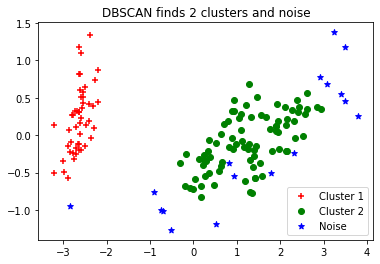

In [32]:
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
  if dbscan.labels_[i] == 0:
    c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
  elif dbscan.labels_[i] == 1:
    c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
  elif dbscan.labels_[i] == -1:
    c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

#DBSCAN produced three groups. 
#The figure closely resembles a two-cluster solution: It shows only 17 instances of label – 1. 
#That’s because it’s a two-cluster solution; the third group (–1) is noise (outliers). 
#increasing disctance from 0.5 to 0.9 will result in no noise 2 cluster solution

In [47]:
import pylab as pl

In [34]:
#extract the sepal and petal data
sepal_data=iris.data[:,:2]  
petal_data=iris.data[:,2:4]

In [46]:
ms = MeanShift()
ms
ms.fit(iris.data)
ms.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

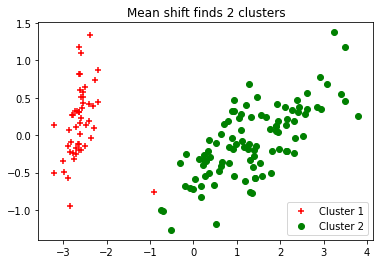

In [49]:
pl.figure('Figure 13-7')
for i in range(0, pca_2d.shape[0]):
  if ms.labels_[i] == 1:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
  elif ms.labels_[i] == 0:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.title('Mean shift finds 2 clusters')
pl.show()